# ML 모델링 프로세스

1. **데이터 수집**
2. **전처리 (클렌징)**
3. **탐색 EDA**(차트그리기, 분포보기 등) (데이터 확인) - **타겟 : 카테고리 > 분류모델, 숫자 > 회귀모델**
4. (사용할) 모델 선택
5. **모델 학습** (데이터 넣어주고)
6. **모델 평가**
7. **모델 성능 개선** >> **3번**으로 돌아가는 것,,or **4번**으로 or **5번**
8. **모델 배포** (내가 원하는 수준까지 도달 시) > **ai 서버**에 로드,, 이후 호출해서 사용하는 **앱 개발**

# 데이터 수집

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
iris_data = iris.data
iris_data.shape # X

(150, 4)

In [37]:
iris_label = iris.target # y=0,1,2
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

X = iris_data
y = iris_label >> category 분류모델 *필요*

# 데이터 분할

훈련용 + 테스트용 >> 8:2, 7:3 (데이터 양 많지 않은 경우)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=42)
#X의 훈련용, 테스트용, y의 훈련용, 테스트용 분할 결과
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [39]:
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

# 4. 모델 선택 > DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier #Class:알고리즘을 구현해 놓은
iris_DT_Clf = DecisionTreeClassifier() #객체 생성
iris_DT_Clf

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

# 5. 모델 학습
x,y를 넣어준다. 단, train을 넣어줌. test는 이후 모델 성능 검증 시 사용

In [41]:
iris_DT_Clf.fit(X_train, y_train)
iris_DT_Clf

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

# 6. 모델 평가
x,y test 데이터 사용

In [42]:
iris_predict = iris_DT_Clf.predict(X_test)
iris_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, iris_predict)

1.0

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,iris_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

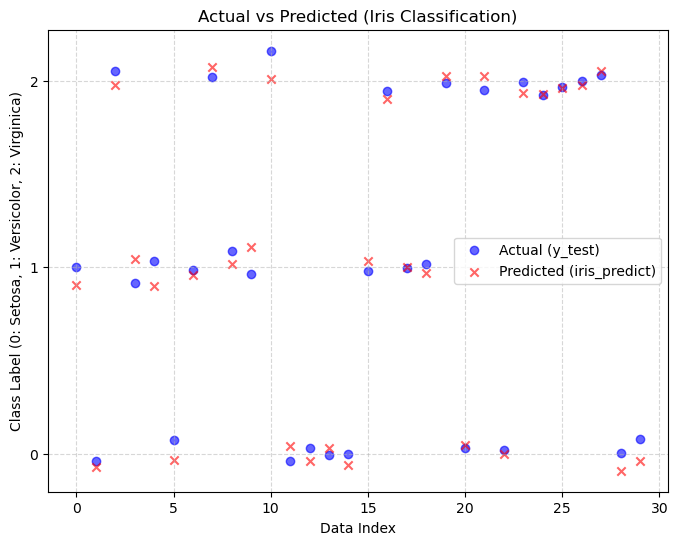

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# 점들이 겹치지 않게 아주 작은 무작위 값을 더해줍니다 (Jittering)
# 이렇게 해야 10개가 겹쳐 있는지 1개가 있는지 보입니다.
jitter_test = y_test + np.random.normal(0, 0.05, len(y_test))
jitter_pred = iris_predict + np.random.normal(0, 0.05, len(iris_predict))

plt.figure(figsize=(8, 6))

# 산점도 그리기
plt.scatter(range(len(y_test)), jitter_test, alpha=0.6, label='Actual (y_test)', marker='o', c='blue')
plt.scatter(range(len(iris_predict)), jitter_pred, alpha=0.6, label='Predicted (iris_predict)', marker='x', c='red')

# 그래프 설정
plt.title('Actual vs Predicted (Iris Classification)')
plt.xlabel('Data Index')
plt.ylabel('Class Label (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.yticks([0, 1, 2]) # 라벨을 0, 1, 2로 고정
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

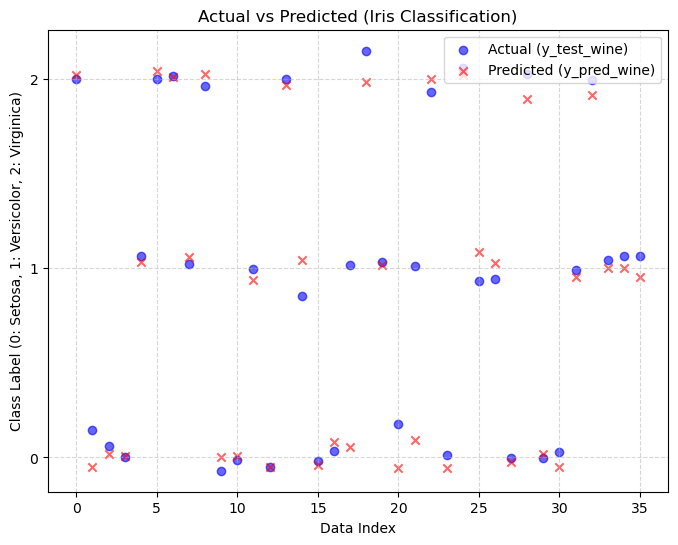

In [53]:
jitter_test = y_test_wine + np.random.normal(0, 0.05, len(y_test_wine))
jitter_pred = y_pred_wine + np.random.normal(0, 0.05, len(y_pred_wine))

plt.figure(figsize=(8, 6))

# 산점도 그리기
plt.scatter(range(len(y_test_wine)), jitter_test, alpha=0.6, label='Actual (y_test_wine)', marker='o', c='blue')
plt.scatter(range(len(y_pred_wine)), jitter_pred, alpha=0.6, label='Predicted (y_pred_wine)', marker='x', c='red')

# 그래프 설정
plt.title('Actual vs Predicted (Iris Classification)')
plt.xlabel('Data Index')
plt.ylabel('Class Label (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.yticks([0, 1, 2]) # 라벨을 0, 1, 2로 고정
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 의사결정나무 알고리즘

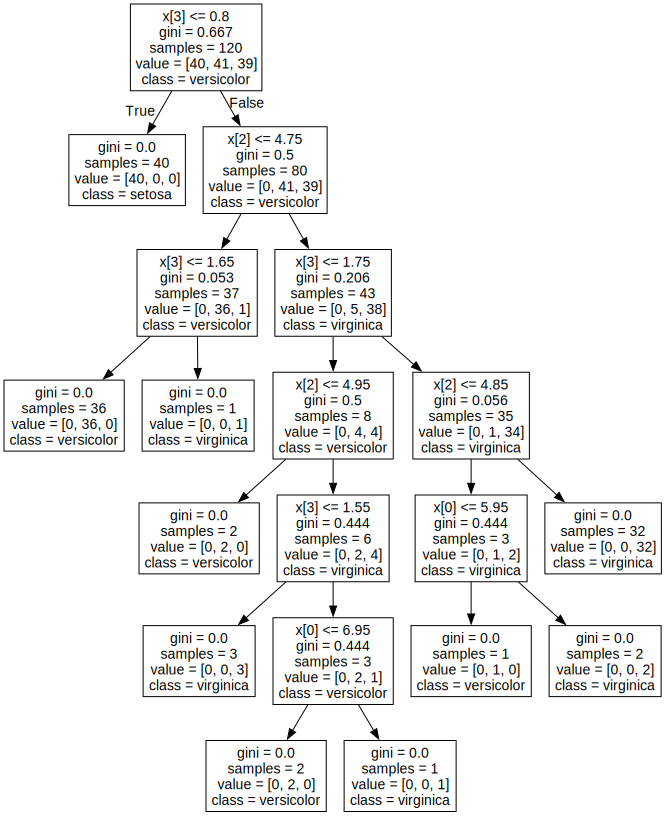

In [57]:
import graphviz
from sklearn.tree import export_graphviz
# 모델의 tree를 파일로 저장합니다.
export_graphviz(iris_DT_Clf, out_file='iris_tree.dot',
                class_names= iris.target_names)
# tree 파일을 읽어옵니다.
with open('iris_tree.dot') as f:
  dot_graph = f.read()
# tree를 그립니다.
graphviz.Source(dot_graph)

# k-fold cross validation 교차검증

In [60]:
import pandas as pd
iris_data_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
iris_data_df['label'] = iris.target
iris_data_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import KFold
kfold_5 = KFold(n_splits=5)
kfold_5

KFold(n_splits=5, random_state=None, shuffle=False)

In [63]:
iris_cv_clf = DecisionTreeClassifier(random_state=42)
iris_cv_clf

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [64]:
for train_index, test_index in kfold_5.split(iris_data):
  X_train, X_test = iris_data[train_index], iris_data[test_index]
  y_train, y_test = iris_label[train_index], iris_label[test_index]
  
  iris_cv_clf.fit(X_train, y_train)
  y_pred = iris_cv_clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f'Accuracy : {acc:.4f}')

Accuracy : 1.0000
Accuracy : 1.0000
Accuracy : 0.8333
Accuracy : 0.9333
Accuracy : 0.8000


# cross_val_score()

In [65]:
from sklearn.model_selection import cross_val_score
X = iris.data
y = iris.target
iris_DT_Clf_cv = DecisionTreeClassifier(random_state=156)
cross_val_score(iris_DT_Clf_cv, X, y, cv=5, scoring='accuracy')

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [66]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
cross_val_score(iris_DT_Clf_cv, X, y, cv=skf, scoring='accuracy')

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

# GridSeachCV

In [69]:
from sklearn.model_selection import GridSearchCV
iris_DT_GCV = DecisionTreeClassifier(random_state=121)
params = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
grid_dt_cv = GridSearchCV(iris_DT_GCV, cv=5, param_grid=params)
grid_dt_cv.fit(X,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...dom_state=121)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [1, 2, ...], 'min_samples_split': [2, 3]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : 

In [71]:
pd.DataFrame(grid_dt_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000967,2.620338e-04,0.000000,0.000000,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,5
1,0.001000,1.784161e-07,0.000000,0.000000,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,5
2,0.001192,2.334977e-04,0.000000,0.000000,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.933333,0.966667,0.900000,0.866667,1.000000,0.933333,0.047140,3
3,0.001031,5.802808e-05,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.933333,0.966667,0.900000,0.866667,1.000000,0.933333,0.047140,3
4,0.000467,5.818995e-04,0.000411,0.000822,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,0.966667,0.933333,1.000000,1.000000,0.973333,0.024944,1
5,0.000308,4.296708e-04,0.000085,0.000170,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,0.966667,0.933333,1.000000,1.000000,0.973333,0.024944,1


# 와인 데이터로 데이터스케일링

In [74]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [75]:
wine_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: float64(13)
m

In [79]:
wine_df['target'] = wine.target
wine_df['target'].value_counts().sort_index()

target
0    59
1    71
2    48
Name: count, dtype: int64

# LogisticRegression

In [88]:
X = wine.data
y = wine.target

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [90]:
from sklearn.linear_model import LogisticRegression
wine_lr_clf = LogisticRegression(max_iter=100)
wine_lr_clf.fit(X_train, y_train)
wine_lr_pred = wine_lr_clf.predict(X_test)
accuracy_score(y_test, wine_lr_pred)

c:\Users\Admin\miniconda3\envs\ml_edu\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

In [91]:
confusion_matrix(y_test, wine_lr_pred)

array([[14,  0,  0],
       [ 0, 14,  1],
       [ 0,  0,  7]])

# 스케일링

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
wine_lr_clf_scaled = LogisticRegression(max_iter=36)
wine_lr_clf_scaled.fit(X_train_scaled,y_train)
wine_lr_pred_scaled = wine_lr_clf_scaled.predict(X_test_scaled)
accuracy_score(y_test, wine_lr_pred_scaled)

1.0